## Image processing Blending and Pasting

##### In this section we will discuss blending and pasting techniques that are often used to blend images together and pasting images on top of each other with help of OpenCV.
---


In [20]:
# import the library

import numpy as np
import matplotlib.pyplot as plt
import cv2

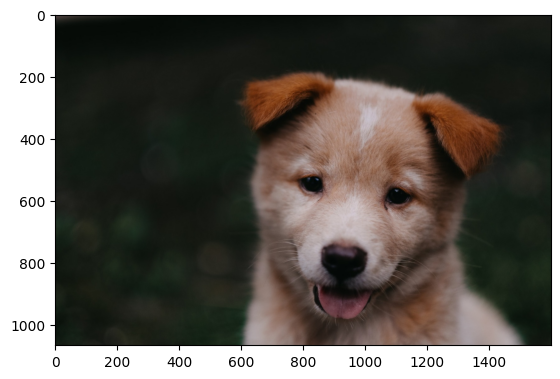

In [21]:
# import the image

img1 = cv2.imread("puppy.jpg")
img2 = cv2.imread("not_copy.png")

## converting to RGB format

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# show image to seethe results

plt.imshow(img1)

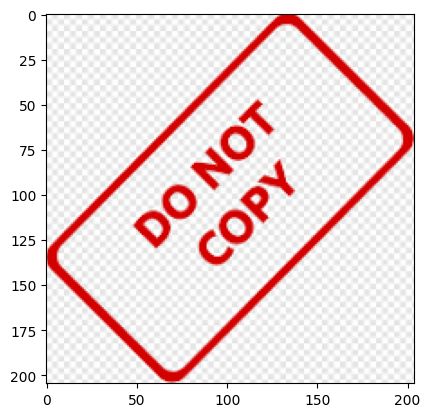

In [22]:
# show the second image

plt.imshow(img2)

#### Now we are going to reseize the image

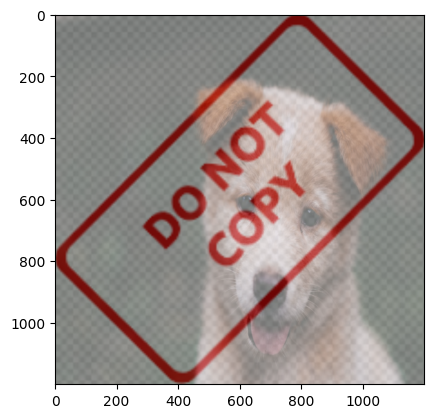

In [23]:
# resize the image using resize function
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

#both image some intensity in blenifing
alpha = 0.5
beta = 0.5

blended = cv2.addWeighted(img1, alpha, img2, beta, gamma=0)
plt.imshow(blended)

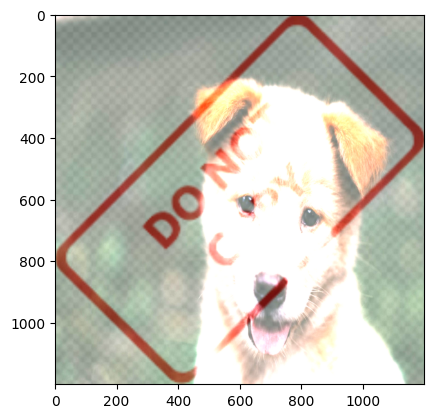

In [24]:
# give the gap
alpha = 2
beta= 0.5

blended = cv2.addWeighted(img1, alpha, img2, beta, gamma=0)
plt.imshow(blended)

#### Ok, now we are going to use resize function to blend two images together

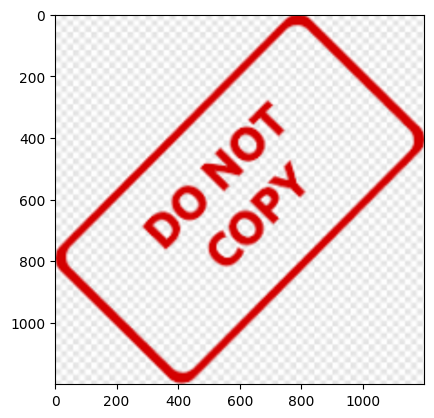

In [25]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1] # offset and lenght of image in smaller image
y_end = y_offset + small_img.shape[0]

large_img [y_offset: y_end, x_offset: x_end] = small_img

plt.imshow(large_img)

In [26]:
# overlay smaller image over larger image

img1 = cv2.imread('puppy.jpg')
img2 = cv2.imread('not_copy.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# resize second image to make it smaller
img2 = cv2.resize(img2,(600,600))

In [27]:
# creating a region of interest - to choose where to mask smaller image on smaller image

img1.shape

(1066, 1600, 3)

In [28]:
x_offset = img1.shape[1]-img2.shape[1]
y_offset = img1.shape[0]-img2.shape[0]

rows,cols,channels = img2.shape

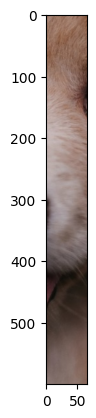

In [40]:
roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[0]]
plt.imshow(roi)

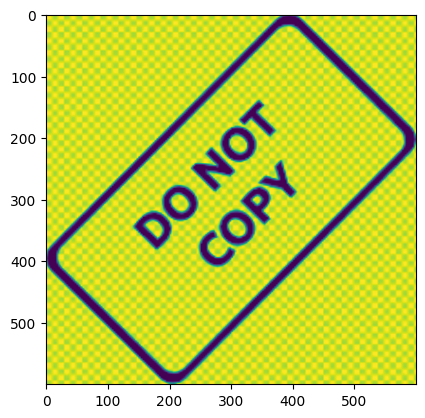

In [30]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray)

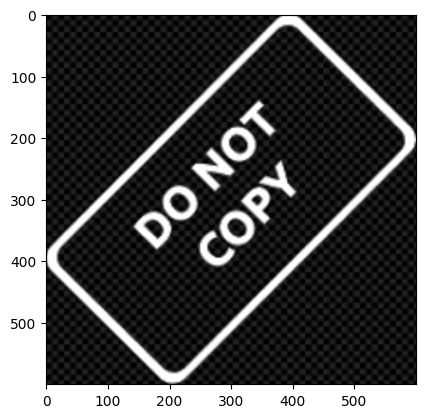

In [31]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

In [32]:
mask_inv.shape

(600, 600)

In [33]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)
white_background.shape

(600, 600, 3)

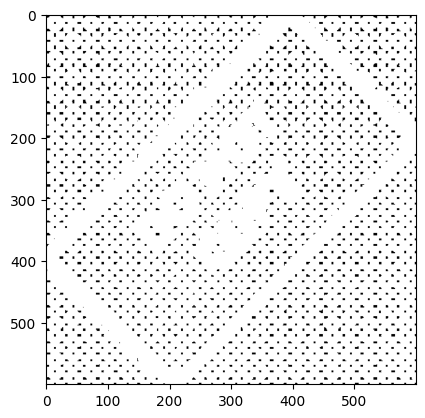

In [34]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
plt.imshow(bk)

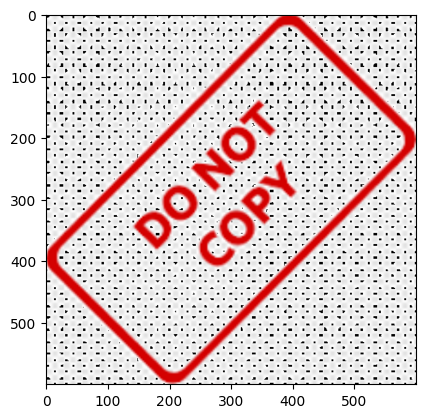

In [35]:
foreground = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(foreground)

In [45]:
final_roi = cv2.bitwise_or(roi,foreground)
plt.imshow(final_roi)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


In [46]:
large_img = img1
small_img = final_roi

large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)

NameError: name 'final_roi' is not defined